# PUNTO 1: Metodo machine learning

Selezionare un metodo di machine learning  per malware detection


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import (accuracy_score,
                            confusion_matrix,
                            classification_report,
                            ConfusionMatrixDisplay)
import matplotlib.pyplot as plt
import os, shutil, pickle

In [2]:
!pip install lief==0.12.0
!pip install ember-mivia
!pip install gdown

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 13.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for ember-mivia: filename=ember_mivia-0.0.6-py3-none-any.whl size=13991 sha256=446d23584a8a456672ac25bb722c42afcb7b8bb92934289e11a16af32dd48acb
  Stored in directory: /root/.cache/pip/wheels/0e/88/68/7b91124461cd44092bd93e61e429cf81210938731268a65c54
Successfully built ember-mivia


### Download Datasets

In [3]:
import gdown

url = '1-FSnNHp0ZWULfetoYGztn_43TMtxSQaM'
gdown.download(id=url, output="training_set.tar.gz")

url = '1-JLM97nRRcxsU-e1KDvY7_OPQBoxx7H2'
gdown.download(id=url, output="validation_set.tar.gz")

url = '1-CNx_k1yEJ-RDC94nXUMlhtc1FQH7lzt'
gdown.download(id=url, output="test_set.tar.gz")

url = '1Dbb9xNCvL1_HqM9H_Hvq34VvW73cu0n1'
gdown.download(id=url, output="VirusShareDataset.tar.gz")


Downloading...
From (original): https://drive.google.com/uc?id=1-FSnNHp0ZWULfetoYGztn_43TMtxSQaM
From (redirected): https://drive.google.com/uc?id=1-FSnNHp0ZWULfetoYGztn_43TMtxSQaM&confirm=t&uuid=d40f8997-7cdf-4cc2-b449-4345911f818f
To: /content/training_set.tar.gz
 83%|████████▎ | 15.2G/18.2G [03:40<00:37, 80.8MB/s]

KeyboardInterrupt: 

In [ ]:
!mkdir -p training validation test test_2

!tar -zxf '/content/training_set.tar.gz' -C /content/training
!rm '/content/training_set.tar.gz'

!tar -zxf '/content/validation_set.tar.gz' -C /content/validation
!rm '/content/validation_set.tar.gz'

!tar -zxf '/content/test_set.tar.gz' -C /content/test
!rm '/content/test_set.tar.gz'

!tar -zxf '/content/VirusShareDataset.tar.gz' -C /content/test_2
!rm '/content/VirusShareDataset.tar.gz'


### Loading of the data

In [ ]:
train_path = '/content/training'
val_path = '/content/validation'
test_path = '/content/test'
test_2_path = '/content/test_2'

In [24]:
from ember.features import PEFeatureExtractor
import zlib

#Extract a feature vector from a binary file using the ember Feature Extractor
def get_ember_features(path, decompress = False):
    extractor = PEFeatureExtractor(print_feature_warning=False)
    if decompress:
      bytes = decompress_file(path)
    else:
      with open(path, 'rb') as f:
        bytes = f.read()

    features = [float(value) for value in extractor.feature_vector(bytes)]
    return features

def decompress_file(input_file_path):
    # read the file
    with open(input_file_path, 'rb') as f:
        compressed_data = f.read()

    # decompress the file with zlib
    decompressed_data = zlib.decompress(compressed_data)

    return decompressed_data

In [25]:
def extract_features(dir, decompress=False):
  features = dict()
  labels = dict()

  for file_name in os.listdir(dir):
    path = os.path.join(dir, file_name)

    print("Extracting features of", file_name)

    if "malware" in path:
      label = 1
    else:
      label = 0

    if os.path.isfile(path) and file_name != 'ashampoo_3d_cad_architecture_8_sm.exe':
      try:
        features[file_name] = get_ember_features(path, decompress=decompress)
        labels[file_name] = label
      except:
        continue

  return features, labels

### Extract featuers

In [ ]:
DRIVE_PATH = "path/to/features/folder"
folders = [train_path, val_path, test_path, test_2_path]

In [ ]:
import pickle, shutil

for element in folders:
  # ----- BENIGN FEATURES -----
  print("Extracting benign features")
  benign_features, benign_labels = extract_features(os.path.join(element, "benign"), False)

  dataset_type = element.split('/')[-1]

  print("Saving pickle files")
  filename = os.path.join('/content/', f"benign_{dataset_type}_features.pkl")

  with open(filename, 'wb') as file:
    pickle.dump(benign_features, file)

  shutil.copy(filename, DRIVE_PATH)

  filename = os.path.join('/content/', f"benign_{dataset_type}_labels.pkl")

  with open(filename, 'wb') as file:
    pickle.dump(benign_labels, file)

  shutil.copy(filename, DRIVE_PATH)

  # ----- MALWARE FEATURES -----
  print("Extracting malware features")
  malware_features, malware_labels = extract_features(os.path.join(element, "malware"), False)

  print("Saving pickle files")
  filename = os.path.join('/content/', f"malware_{dataset_type}_features.pkl")

  with open(filename, 'wb') as file:
    pickle.dump(malware_features, file)
  shutil.copy(filename, DRIVE_PATH)

  filename = os.path.join('/content/', f"malware_{dataset_type}_labels.pkl")
  with open(filename, 'wb') as file:
    pickle.dump(malware_labels, file)
  shutil.copy(filename, DRIVE_PATH)

### Load features

In [4]:
import gdown

url_hand_crafted = "https://drive.google.com/drive/folders/1mGs-4zhMGY70pkJiszL7mIfrFc1Obm57?usp=sharing"

gdown.download_folder(url=url_hand_crafted)

Retrieving folder contents


Processing file 1orNB1HbG04HeM1VTJLfw1Rtf3OGVeoIt benign_test_features.pkl
Processing file 1MdvByM_eL9ld046QZrurstOgvbiOF4Ys benign_test_labels.pkl
Processing file 1uhXcmpIQxSOQdT9C2hORcdjnPq5dDMAQ benign_training_features.pkl
Processing file 1PIah6T99WAAeESkBdk8VP1uWi7eEXzi6 benign_training_labels.pkl
Processing file 1Bi3HWMxwCDodXK9F3eDdjwTvtkTBHF6c benign_validation_features.pkl
Processing file 1CvHAdb7G5-zQhzgN-cj4DtEFxTMWwnkf benign_validation_labels.pkl
Processing file 1Kfih99WHBeWaYCyi675cj1Z0AJk9eu7I benign_vsd_features.pkl
Processing file 1hxRqM0pJ4cMfDH60hdZWZ3OMVk24yFTj benign_vsd_labels.pkl
Processing file 12EVQ_ybz3b_8b-tifIi1oUVhRrLAn49F malware_test_features.pkl
Processing file 187D0fwZfDZIgyjlH8BklVs_VmViqcNz2 malware_test_labels.pkl
Processing file 1XZG99B_RNeszabF-cnqyIdXZRfbEfeuO malware_training_features.pkl
Processing file 12LFdIxOvkFB0-ApF9V3CwLYMpr82XfZ7 malware_training_labels.pkl
Processing file 15JJ0JkzhjJ6r8kx3f9Lia8yw1FVzldZu malware_validation_features.pkl


Retrieving folder contents completed
Building directory structure
Building directory structure completed
 83%|████████▎ | 15.2G/18.2G [04:00<00:37, 80.8MB/s]Downloading...
From: https://drive.google.com/uc?id=1orNB1HbG04HeM1VTJLfw1Rtf3OGVeoIt
To: /content/extracted_features/benign_test_features.pkl

  0%|          | 0.00/13.3M [00:00<?, ?B/s]
 36%|███▌      | 4.72M/13.3M [00:00<00:00, 21.1MB/s]
100%|██████████| 13.3M/13.3M [00:00<00:00, 28.8MB/s]
Downloading...
From: https://drive.google.com/uc?id=1MdvByM_eL9ld046QZrurstOgvbiOF4Ys
To: /content/extracted_features/benign_test_labels.pkl

100%|██████████| 39.1k/39.1k [00:00<00:00, 48.4MB/s]
Downloading...
From: https://drive.google.com/uc?id=1uhXcmpIQxSOQdT9C2hORcdjnPq5dDMAQ
To: /content/extracted_features/benign_training_features.pkl

  0%|          | 0.00/94.2M [00:00<?, ?B/s]
  5%|▌         | 4.72M/94.2M [00:00<00:03, 23.6MB/s]
  9%|▉         | 8.91M/94.2M [00:00<00:03, 21.4MB/s]
 16%|█▌        | 14.7M/94.2M [00:00<00:02, 31.6MB/s]
 20

['/content/extracted_features/benign_test_features.pkl',
 '/content/extracted_features/benign_test_labels.pkl',
 '/content/extracted_features/benign_training_features.pkl',
 '/content/extracted_features/benign_training_labels.pkl',
 '/content/extracted_features/benign_validation_features.pkl',
 '/content/extracted_features/benign_validation_labels.pkl',
 '/content/extracted_features/benign_vsd_features.pkl',
 '/content/extracted_features/benign_vsd_labels.pkl',
 '/content/extracted_features/malware_test_features.pkl',
 '/content/extracted_features/malware_test_labels.pkl',
 '/content/extracted_features/malware_training_features.pkl',
 '/content/extracted_features/malware_training_labels.pkl',
 '/content/extracted_features/malware_validation_features.pkl',
 '/content/extracted_features/malware_validation_labels.pkl',
 '/content/extracted_features/malware_vsd_features.pkl',
 '/content/extracted_features/malware_vsd_labels.pkl']

Loading training features from drive and shuffling it

In [5]:
import pickle
from sklearn.utils import shuffle

def get_features_from_folder(folder_path, to_shuffle=False, type_of_dataset="training"):
  benign_features_path = f"{folder_path}/benign_{type_of_dataset}_features.pkl"
  benign_labels_path = f"{folder_path}/benign_{type_of_dataset}_labels.pkl"
  malware_features_path = f"{folder_path}/malware_{type_of_dataset}_features.pkl"
  malware_labels_path = f"{folder_path}/malware_{type_of_dataset}_labels.pkl"

  with open(benign_features_path, 'rb') as file:
    benign_features: dict = pickle.load(file)

  with open(benign_labels_path, 'rb') as file:
    benign_labels: dict = pickle.load(file)

  with open(malware_features_path, 'rb') as file:
    malware_features: dict = pickle.load(file)

  with open(malware_labels_path, 'rb') as file:
    malware_labels: dict = pickle.load(file)

  print(type_of_dataset.capitalize())
  print("Number of benign files:", len(benign_features))
  print("Number of malware files:", len(malware_features))

  features_1 = dict()
  for key in benign_features:
    features_1[key] = (benign_labels[key], benign_features[key])

  features_2 = dict()
  for key in malware_features:
    features_2[key] = (malware_labels[key], malware_features[key])

  features = {**features_1, **features_2}

  print("Total number of files:", len(features))

  features = list(features.values())

  y = [t[0] for t in features]
  x = [t[1] for t in features]

  if to_shuffle:
    x, y = shuffle(x, y, random_state=42)

  return (x, y)

Getting features from the donwloaded folder:

In [6]:
path_features = '/content/extracted_features'

In [7]:
x_train_original, y_train_original = get_features_from_folder(f"{path_features}", type_of_dataset="training", to_shuffle=True)
x_val_original, y_val_original = get_features_from_folder(f"{path_features}", type_of_dataset="validation", to_shuffle=False)
x_test_original, y_test_original = get_features_from_folder(f"{path_features}", type_of_dataset="test", to_shuffle=False)
x_test_2_original, y_test_2_original = get_features_from_folder(f"{path_features}", type_of_dataset="vsd", to_shuffle=False)

Training
Number of benign files: 4383
Number of malware files: 4598
Total number of files: 8981
Validation
Number of benign files: 1245
Number of malware files: 1313
Total number of files: 2558
Test
Number of benign files: 618
Number of malware files: 656
Total number of files: 1274
Vsd
Number of benign files: 986
Number of malware files: 1000
Total number of files: 1986


Removing all the unnecessary features:

In [8]:
def remove_features(x, y):
  x_filtered = []
  y_filtered = []

  for i, feature in enumerate(x):
    # features to remove are in range 626, [627:637] and [647:657]
    x_filtered.append(feature[:626] + feature[637:647] + feature[657:])
    y_filtered.append(y[i])

  return x_filtered, y_filtered

In [9]:
x_train, y_train = remove_features(x_train_original, y_train_original)
x_test, y_test = remove_features(x_test_original, y_test_original)
x_test_2, y_test_2 = remove_features(x_test_2_original, y_test_2_original)

### Grid Search training

In [10]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

def test_model(model, x, y, model_name, type_of_dataset):
  y_pred = model.predict(x)
  print("%d exact prediction over %d samples"
      % ((y == y_pred).sum(), len(x)))
  cm = confusion_matrix(y, y_pred, normalize='true')
  print("Normalized confusion matrix \n %s" % cm)
  print("Classification report\n %s" % (classification_report(y, y_pred)))
  print("Accuracy score: %.3f" % (accuracy_score(y, y_pred)))
  ConfusionMatrixDisplay(cm).plot()
  plt.savefig(f"{model_name}_{type_of_dataset}.png")

loaded_models = None

#### Load all models

If you want to skip all training procedures, you can run the following two cells and execute only cells of test.

In [11]:
import gdown

id = '1d7TYuKNarcCDyb_U_STf9GPb4guDesJP'

gdown.download_folder(id=id)

loaded_models = True

Retrieving folder contents


Processing file 1gZK6tnH0SR-FVqLGQc6y_jS_EHnyjErj adaboost_classifier.pkl
Processing file 1zLbny4nGjPzpDTjpS29Tygd1_h9Dh05u light_gbm.pkl
Processing file 1AgHjc-Qls2By4oL3I8AognUZtKE42UQj random_forest_classifier.pkl
Processing file 1u4AhwQgwNk-0F7GONRL2LXdrDiFz3Ao2 voting_classifier.pkl
Processing file 1vgBVzz4MmBdz-Ekk2ScyosAa8dGqS_kX xgboost_classifier.pkl


Retrieving folder contents completed
Building directory structure
Building directory structure completed
Downloading...
From: https://drive.google.com/uc?id=1gZK6tnH0SR-FVqLGQc6y_jS_EHnyjErj
To: /content/models/adaboost_classifier.pkl

100%|██████████| 266k/266k [00:00<00:00, 73.6MB/s]
Downloading...
From: https://drive.google.com/uc?id=1zLbny4nGjPzpDTjpS29Tygd1_h9Dh05u
To: /content/models/light_gbm.pkl

100%|██████████| 806k/806k [00:00<00:00, 98.2MB/s]
Downloading...
From: https://drive.google.com/uc?id=1AgHjc-Qls2By4oL3I8AognUZtKE42UQj
To: /content/models/random_forest_classifier.pkl

  0%|          | 0.00/4.60M [00:00<?, ?B/s]
100%|██████████| 4.60M/4.60M [00:00<00:00, 30.6MB/s]
Downloading...
From: https://drive.google.com/uc?id=1u4AhwQgwNk-0F7GONRL2LXdrDiFz3Ao2
To: /content/models/voting_classifier.pkl

  0%|          | 0.00/10.9M [00:00<?, ?B/s]
100%|██████████| 10.9M/10.9M [00:00<00:00, 22.8MB/s]
Downloading...
From: https://drive.google.com/uc?id=1vgBVzz4MmBdz-Ekk2ScyosAa8dGqS

In [12]:
def load_model(name_model, loaded_model=None):

  model = None

  if loaded_model is not None:
    model_path = f"models/{name_model}.pkl"
    with open(model_path, 'rb') as file:
      model = pickle.load(file)

  if model is not None:
    print("Best parameters:", model.get_params())

  return model


#### Random Forest

 [[documentation]](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)

### Parameters

- SAMPLE_SPLIT: (integer) Minimum number of samples required to split a node of the tree (default is 2)
- MAX_FEATURES: (string) how the random forest selects the maximum number of features to be used to evaluate the best split. (default is 'sqrt')
  - 'sqrt' selects a number of features that is the square root of the total
  - 'log2' selects a number of features that is the logarithm of the total
  - None selects all the features
- NUM_ESTIMATORS: (integer) number of tree composing the forest (default is 100). Increasing the number of trees is expected to increase th accuracy, but increasing the computation time for each prediction.
- MAX_DEPTH: (integer) maximum depth for each tree in the forest.

If you don't want to run a training, you can skip this cell and execute only the next cell, contained the test.

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
import numpy as np

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1000, num = 10)]
# Number of features to consider at every split
max_features = ['sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 20, num = 5)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]

param_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

# Creating a random forest
random_forest_model = RandomForestClassifier()

# Search of the best parameters by using RandomizedSearchCV
grid_search = RandomizedSearchCV(random_forest_model, param_grid, cv=5, scoring='accuracy', n_jobs = -1, verbose=3)
grid_search.fit(x_train, y_train)

# Visualizzazione dei migliori iperparametri
print("Best parameters:", grid_search.best_params_)

random_forest_model = grid_search.best_estimator_


##### Load model from directory

In [13]:
random_forest_model = load_model('random_forest_classifier', loaded_models)

Best parameters: {'bootstrap': False, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 2, 'min_samples_split': 10, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}


##### Random Forest test

1247 exact prediction over 1274 samples
Normalized confusion matrix 
 [[0.99190939 0.00809061]
 [0.03353659 0.96646341]]
Classification report
               precision    recall  f1-score   support

           0       0.97      0.99      0.98       618
           1       0.99      0.97      0.98       656

    accuracy                           0.98      1274
   macro avg       0.98      0.98      0.98      1274
weighted avg       0.98      0.98      0.98      1274

Accuracy score: 0.979
1261 exact prediction over 1986 samples
Normalized confusion matrix 
 [[0.97768763 0.02231237]
 [0.703      0.297     ]]
Classification report
               precision    recall  f1-score   support

           0       0.58      0.98      0.73       986
           1       0.93      0.30      0.45      1000

    accuracy                           0.63      1986
   macro avg       0.75      0.64      0.59      1986
weighted avg       0.76      0.63      0.59      1986

Accuracy score: 0.635


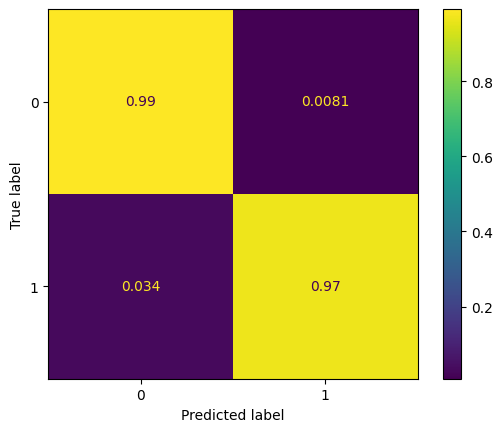

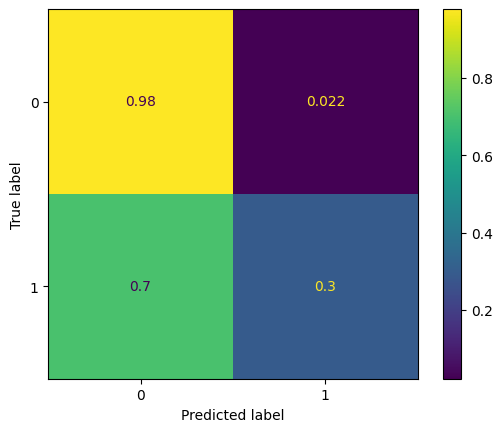

In [14]:
test_model(random_forest_model, x_test, y_test, "random forest", "sorel20m")
test_model(random_forest_model, x_test_2, y_test_2, "random forest", "vsd")

#### AdaBoost

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import AdaBoostClassifier

# Defining the parameters to use during GridSearch
param_grid = {
    'n_estimators': [10, 50, 100, 500],
    'learning_rate': [0.001, 0.01, 0.1, 1.0]
}

adaBoostModel = AdaBoostClassifier()

# Search of the best parameters by using RandomizedSearchCV
grid_search = GridSearchCV(adaBoostModel, param_grid, cv=5, scoring='accuracy', verbose=3)
grid_search.fit(x_train, y_train)

print("Best parameters:", grid_search.best_params_)

adaboost_model = grid_search.best_estimator_

# Saving model
root = '/content/drive/Shareddrives/AFC/hand_crafted/models'
with open(f'{root}/adaboost_best_model.pkl', 'wb') as file:
    pickle.dump(adaboost_model, file)



##### Load model from directory

In [15]:
adaboost_model = load_model('adaboost_classifier', loaded_models)

Best parameters: {'algorithm': 'SAMME.R', 'base_estimator': 'deprecated', 'estimator': None, 'learning_rate': 1.0, 'n_estimators': 500, 'random_state': None}


##### AdaBoost test

1254 exact prediction over 1274 samples
Normalized confusion matrix 
 [[0.98705502 0.01294498]
 [0.01829268 0.98170732]]
Classification report
               precision    recall  f1-score   support

           0       0.98      0.99      0.98       618
           1       0.99      0.98      0.98       656

    accuracy                           0.98      1274
   macro avg       0.98      0.98      0.98      1274
weighted avg       0.98      0.98      0.98      1274

Accuracy score: 0.984
1171 exact prediction over 1986 samples
Normalized confusion matrix 
 [[0.93509128 0.06490872]
 [0.751      0.249     ]]
Classification report
               precision    recall  f1-score   support

           0       0.55      0.94      0.69       986
           1       0.80      0.25      0.38      1000

    accuracy                           0.59      1986
   macro avg       0.67      0.59      0.54      1986
weighted avg       0.67      0.59      0.54      1986

Accuracy score: 0.590


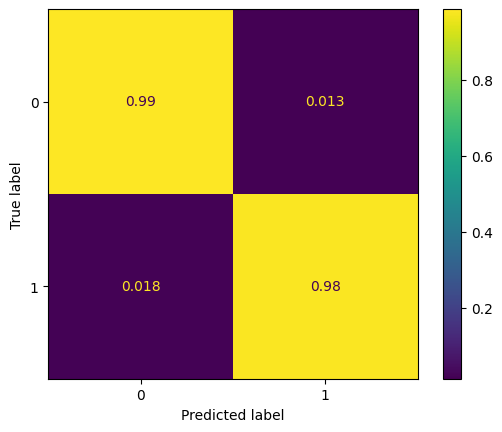

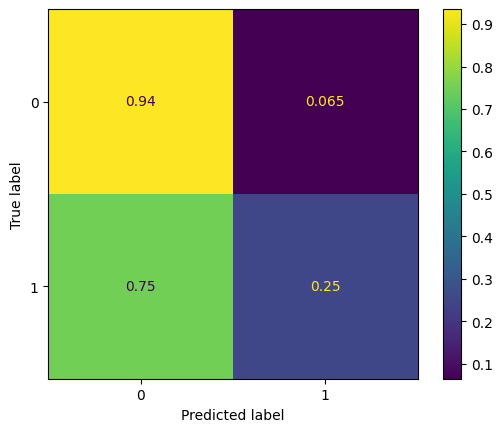

In [16]:
test_model(adaboost_model, x_test, y_test, "adaboost", "sorel20m")
test_model(adaboost_model, x_test_2, y_test_2, "adaboost", "vsd")

#### LightGBM

In [ ]:
from lightgbm import LGBMClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import KFold

param_grid = {
  'learning_rate': [0.01, 0.1, 1],
  'num_leaves': [31, 127, 255],
  'reg_alpha': [0.1, 0.5],
  'min_data_in_leaf': [30, 50, 100, 300, 400],
  'random_state': [42]
  }

lgb_estimator = LGBMClassifier(boosting_type='gbdt',  objective='binary', num_boost_round=500)

grid_search = RandomizedSearchCV(lgb_estimator, param_grid, cv=5, scoring='accuracy', verbose=3)
lgb_model = grid_search.fit(x_train, y_train)

print("Best parameters:", grid_search.best_params_)

lgbm_model = grid_search.best_estimator_

# Saving model
root = "path/to/save/model"
with open(f'{root}/best_lgbm_model.pkl', 'wb') as file:
    pickle.dump(best_lgbm_model, file)



##### Load model from directory

In [17]:
lgbm_model = load_model('light_gbm', loaded_models)

Best parameters: {'boosting_type': 'gbdt', 'class_weight': None, 'colsample_bytree': 1.0, 'importance_type': 'split', 'learning_rate': 0.1, 'max_depth': -1, 'min_child_samples': 20, 'min_child_weight': 0.001, 'min_split_gain': 0.0, 'n_estimators': 100, 'n_jobs': None, 'num_leaves': 255, 'objective': 'binary', 'random_state': 42, 'reg_alpha': 0.5, 'reg_lambda': 0.0, 'subsample': 1.0, 'subsample_for_bin': 200000, 'subsample_freq': 0, 'num_boost_round': 500, 'min_data_in_leaf': 100}


##### Light GBM test

[LightGBM] [Warning] min_data_in_leaf is set=100, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=100
1259 exact prediction over 1274 samples
Normalized confusion matrix 
 [[0.99190939 0.00809061]
 [0.0152439  0.9847561 ]]
Classification report
               precision    recall  f1-score   support

           0       0.98      0.99      0.99       618
           1       0.99      0.98      0.99       656

    accuracy                           0.99      1274
   macro avg       0.99      0.99      0.99      1274
weighted avg       0.99      0.99      0.99      1274

Accuracy score: 0.988
[LightGBM] [Warning] min_data_in_leaf is set=100, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=100
1156 exact prediction over 1986 samples
Normalized confusion matrix 
 [[0.97261663 0.02738337]
 [0.803      0.197     ]]
Classification report
               precision    recall  f1-score   support

           0       0.54      0.97      0.70       986
      

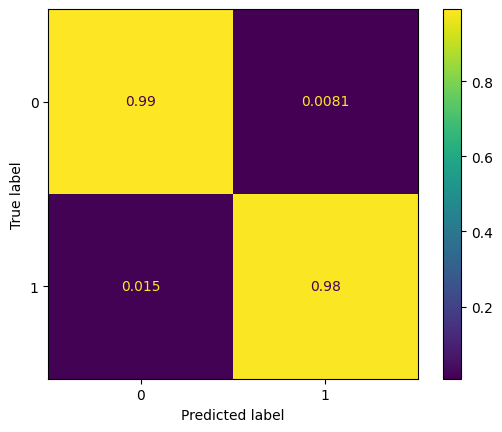

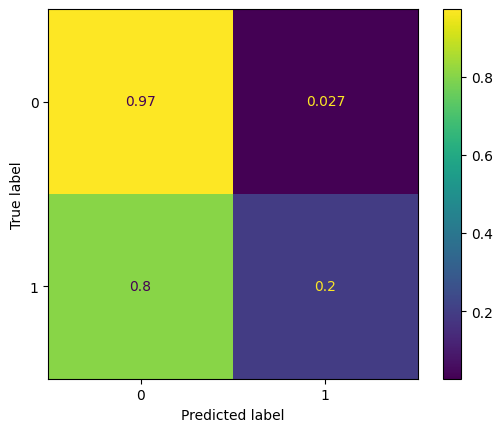

In [18]:
test_model(lgbm_model, x_test, y_test, "lgbm", "sorel20m")
test_model(lgbm_model, x_test_2, y_test_2, "lgbm", "vsd")

#### XGBoost

In [ ]:
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV
NUM_ESTIMATORS = 50
MAX_DEPTH = 10
LEARNING_RATE = 1

param_grid = {
  'learning_rate': [0.01, 0.1, 1],
  'n_estimators' : [50, 100],
  'max_depth': [10, 20, 30],
  'objective': ['binary:logistic']
  }

#Initializing the XGboost Classifier
xgb = XGBClassifier(
  n_estimators=NUM_ESTIMATORS,
  max_depth=MAX_DEPTH,
  learning_rate=LEARNING_RATE
  )

# Training XGBoost
grid_search = RandomizedSearchCV(xgb, param_grid, cv=5, scoring='accuracy', verbose=3)

xgb_model = grid_search.fit(x_train, y_train)

xgb_model = xgb_model.best_estimator_

trained_model = True

##### Load model from **directory**

In [19]:
xgb_model = load_model('xgboost_classifier', loaded_models)

Best parameters: {'objective': 'binary:logistic', 'base_score': None, 'booster': None, 'callbacks': None, 'colsample_bylevel': None, 'colsample_bynode': None, 'colsample_bytree': None, 'device': None, 'early_stopping_rounds': None, 'enable_categorical': False, 'eval_metric': None, 'feature_types': None, 'gamma': None, 'grow_policy': None, 'importance_type': None, 'interaction_constraints': None, 'learning_rate': 0.1, 'max_bin': None, 'max_cat_threshold': None, 'max_cat_to_onehot': None, 'max_delta_step': None, 'max_depth': 30, 'max_leaves': None, 'min_child_weight': None, 'missing': nan, 'monotone_constraints': None, 'multi_strategy': None, 'n_estimators': 100, 'n_jobs': None, 'num_parallel_tree': None, 'random_state': None, 'reg_alpha': None, 'reg_lambda': None, 'sampling_method': None, 'scale_pos_weight': None, 'subsample': None, 'tree_method': None, 'validate_parameters': None, 'verbosity': None}


##### XGBoost test

1253 exact prediction over 1274 samples
Normalized confusion matrix 
 [[0.98381877 0.01618123]
 [0.01676829 0.98323171]]
Classification report
               precision    recall  f1-score   support

           0       0.98      0.98      0.98       618
           1       0.98      0.98      0.98       656

    accuracy                           0.98      1274
   macro avg       0.98      0.98      0.98      1274
weighted avg       0.98      0.98      0.98      1274

Accuracy score: 0.984
1302 exact prediction over 1986 samples
Normalized confusion matrix 
 [[0.95030426 0.04969574]
 [0.635      0.365     ]]
Classification report
               precision    recall  f1-score   support

           0       0.60      0.95      0.73       986
           1       0.88      0.36      0.52      1000

    accuracy                           0.66      1986
   macro avg       0.74      0.66      0.62      1986
weighted avg       0.74      0.66      0.62      1986

Accuracy score: 0.656


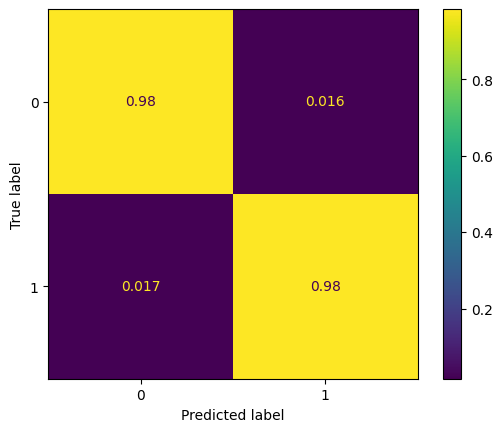

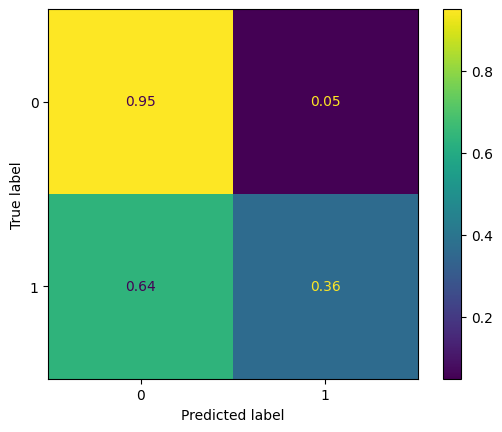

In [20]:
test_model(xgb_model, x_test, y_test, "xgb", "sorel20m")
test_model(xgb_model, x_test_2, y_test_2, "xgb", "vsd")

### Ensemble model

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import cross_val_score

try:
  pred1 = random_forest_model

except:
  pred1 = load_model('random_forest_classifier', loaded_models, trained_model)

try:
  pred2 = xgb_model
except:
  pred2 = load_model('xgboost_classifier', loaded_models, trained_model)


labels = ['Random Forest Classifier', 'XGB', 'Ensamble']

voting_classifier = VotingClassifier(
  estimators=[('dt', pred1), ('xgb', pred2)],
  voting='soft'
  )

voting_classifier.fit(x_train, y_train)

##### Load model from **directory**

In [21]:
voting_classifier = load_model('voting_classifier', loaded_models)

Best parameters: {'estimators': [('dt', RandomForestClassifier(bootstrap=False, min_samples_leaf=2,
                       min_samples_split=10)), ('adaboost', AdaBoostClassifier(n_estimators=500)), ('xgb', XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=30, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...))], 'flatten_transform': True, 'n_jobs':

##### Ensemble model

1252 exact prediction over 1274 samples
Normalized confusion matrix 
 [[0.98543689 0.01456311]
 [0.01981707 0.98018293]]
Classification report
               precision    recall  f1-score   support

           0       0.98      0.99      0.98       618
           1       0.99      0.98      0.98       656

    accuracy                           0.98      1274
   macro avg       0.98      0.98      0.98      1274
weighted avg       0.98      0.98      0.98      1274

Accuracy score: 0.983
1306 exact prediction over 1986 samples
Normalized confusion matrix 
 [[0.96146045 0.03853955]
 [0.642      0.358     ]]
Classification report
               precision    recall  f1-score   support

           0       0.60      0.96      0.74       986
           1       0.90      0.36      0.51      1000

    accuracy                           0.66      1986
   macro avg       0.75      0.66      0.62      1986
weighted avg       0.75      0.66      0.62      1986

Accuracy score: 0.658


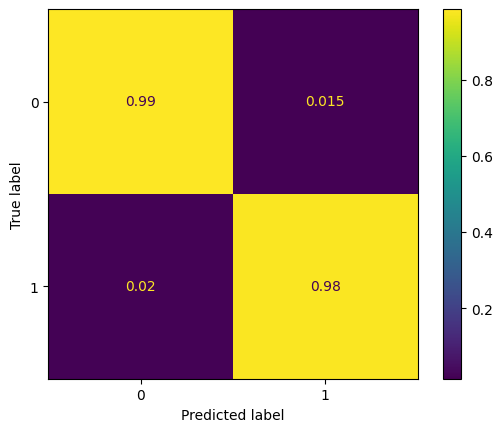

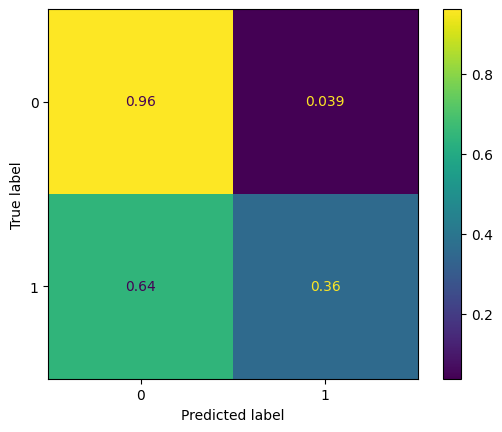

In [22]:
test_model(voting_classifier, x_test, y_test, 'vc_soft_rf_xgb', 'sorel20m')
test_model(voting_classifier, x_test_2, y_test_2, 'vc_soft_rf_xgb', 'vsd')

### Feature analysis

In [ ]:
extractor = PEFeatureExtractor(print_feature_warning=False)

# get the feature range from EMBER feature extractor
categories = extractor.get_feature_range()

# get the feature importance
feature_importances = adaboost_model.feature_importances_

# Create a list of tuples (feature_index , feature_importance)
feature_importance_list = [(idx, importance) for idx, importance in enumerate(feature_importances)]

# sort the list
sorted_feature_importance = sorted(feature_importance_list, key=lambda x: x[1], reverse=True)[:30]

# print the list w.r.t. their importances
for rank, (feature_idx, importance) in enumerate(sorted_feature_importance, start=1):
    for category, (start, end) in categories.items():
        if start <= feature_idx < end:
            print(f"Rank {rank}: Feature {feature_idx} - Importance: {importance:.4f} - Category: {category}")
            break

In [ ]:
print("MALWARE FEATURES:\n")

benign_features_path = "path/to/benign_features"
malware_features_path = "path/to/malware_features"

with open(benign_features_path, 'rb') as file:
  benign_features: dict = list(pickle.load(file).values())

with open(malware_features_path, 'rb') as file:
  malware_features: dict = list(pickle.load(file).values())

for feature_vector in malware_features[:10]:
  print(feature_vector[655])

print("\nBENIGN FEATURES:\n")
for feature_vector in benign_features[:10]:
  print(feature_vector[655])

In [ ]:
url = '1-CNx_k1yEJ-RDC94nXUMlhtc1FQH7lzt'
gdown.download(id=url, output="test_set.tar.gz")

In [ ]:
!mkdir test
!tar -zxf '/content/test_set.tar.gz' -C /content/test
!rm '/content/test_set.tar.gz'

In [ ]:
import json
extractor = PEFeatureExtractor(print_feature_warning=False)
print( json.dumps(extractor.get_feature_range(), indent=4) )

In [ ]:
import random

with open(os.path.join('/content/test/benign', random.choice(os.listdir('/content/test/benign'))), 'rb') as f:
    bytes = f.read()

starting_value = extractor.get_feature_range()['histogram'][0]
rv = extractor.get_header_features_index(bytes)

for key in rv:
  if type(rv[key]) == tuple:
    print(f'{key}: {rv[key][0] + starting_value} - {rv[key][1] + starting_value}')
  else:
    print(f'{key}: {rv[key] + starting_value}')

In [ ]:
from ember.features import PEFeatureExtractor

malware_dir = '/content/test/benign'
extractor = PEFeatureExtractor(print_feature_warning=False)

for malware_file in os.listdir(malware_dir):
  with open(os.path.join(malware_dir, malware_file), 'rb') as file:
    raw, processed = extractor.get_raw_and_processed_features(file.read() , 'header')
    print("File: ", malware_file)
    print("\tMachine Value: ", raw['coff']['machine'])
    print("\tSubsystem value: ", raw['optional']['subsystem'], "\n")

In [ ]:
from ember.features import PEFeatureExtractor

malware_dir = '/content/test/malware'
extractor = PEFeatureExtractor(print_feature_warning=False)

for malware_file in os.listdir(malware_dir):
  with open(os.path.join(malware_dir, malware_file), 'rb') as file:
    raw, processed = extractor.get_raw_and_processed_features(file.read() , 'header')
    print("File: ", malware_file)
    print("\tMachine Value: ", raw['coff']['machine'])
    print("\tSubsystem value: ", raw['optional']['subsystem'], "\n")